### 使用卷积实现mnist数据集分类

In [1]:
import numpy as np
import tensorflow as tf
import os
import keras

In [2]:
print(tf.__version__)

2.2.0


**加载本地fashion_mnist数据集**

下载到本地的数据集一般有两种格式：numpy的压缩格式.npz，以及gzip压缩格式.gz

1、加载npz格式数据集

In [3]:
def load_npz_data(data_path):
    data = np.load(data_path)
    x_train, y_train, x_test, y_test =  data['x_train'],data['y_train'],data['x_test'],data['y_test']

    # 可以将其中一条数据保存成txt文件，查看一下，会对这组数据有个直观的感受
    # np.savetxt('test.txt',x_train[0],fmt='%3d',newline='\n\n')
    
    # 将数据归一化
    x_train, x_test = x_train/255.0, x_test/255.0

    return x_train, y_train, x_test, y_test

2、加载gz格式数据集

In [4]:
def load_gz_data(data_path):
    import os
    import gzip

    # 定义加载数据的函数，data_path为保存gz数据的文件夹，该文件夹下有4个文件
    # 'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
    # 't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'

    files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]
    paths = []
    for fname in files:
        paths.append(os.path.join(data_path,fname))

    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

    return (x_train, y_train), (x_test, y_test)

#### 加载fashin_mnist数据集

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_gz_data("E:/02Studying/03DeepLearning/dataset/fashin_mnist")

显示部分fashin_mnist数据集

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

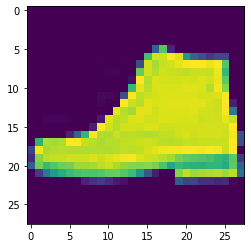

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images[42])
print(train_labels[42])
print(train_images[42])
print(train_images.shape)
print(test_images.shape)

#### 处理数据、归一化数据
归一化数据，使数据处于0到1之间

In [7]:
train_images = train_images.reshape(60000,28,28,1)
train_images = train_images / 255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0

#### 设计模型
输入层 --> 隐藏层 --> 输出层

In [8]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### 设置优化器和损失函数

In [9]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy')
model.summary()
model.fit(train_images, train_labels, epochs=20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

KeyboardInterrupt: 

#### 验证集

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3253


0.32527869939804077

In [12]:
classifications = model.predict(test_images)

print(classifications[10])
print(test_labels[10])

[2.3867237e-09 1.7442044e-12 2.7743708e-03 1.1523531e-10 9.9570978e-01
 1.3083550e-10 1.5159313e-03 7.1459304e-11 2.5775741e-13 1.4238899e-09]
4


#### 可视化

In [18]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


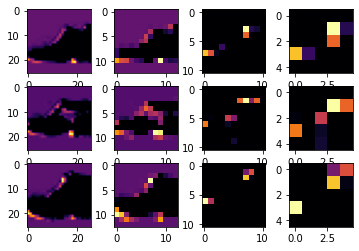

In [28]:
import matplotlib.pyplot as plt 
f, axarr = plt.subplots(3, 4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIED_IMAGE=28
CONVOLUTION_NUMBER = 17
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIED_IMAGE].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)